Movie Review Sentiment Analysis

In [77]:
# 0.Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow
import sklearn
import keras

1. Load Data

In [78]:
data_1 = pd.read_csv("rotten_tomatoes_movie_reviews.csv")
data_2 = pd.read_csv("rotten_tomatoes_movies.csv")

2. EDA

In [79]:
data_1.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [80]:
data_1.info

<bound method DataFrame.info of                                         id   reviewId creationDate  \
0                                  beavers    1145982   2003-05-23   
1                               blood_mask    1636744   2007-06-02   
2        city_hunter_shinjuku_private_eyes    2590987   2019-05-28   
3        city_hunter_shinjuku_private_eyes    2558908   2019-02-14   
4                       dangerous_men_2015    2504681   2018-08-29   
...                                    ...        ...          ...   
1444958              thor_love_and_thunder  102706151   2022-07-05   
1444959              thor_love_and_thunder  102706150   2022-07-05   
1444960              thor_love_and_thunder  102706149   2022-07-05   
1444961              thor_love_and_thunder  102706148   2022-07-05   
1444962              thor_love_and_thunder  102706147   2022-07-05   

              criticName  isTopCritic originalScore reviewState  \
0        Ivan M. Lincoln        False         3.5/4       fr

In [81]:
data_2.info

<bound method DataFrame.info of                                                        id  \
0                                      space-zombie-bingo   
1                                         the_green_grass   
2                                               love_lies   
3                                    the_sore_losers_1997   
4                                    dinosaur_island_2002   
...                                                   ...   
143253  nadia_the_secret_of_blue_water_the_motion_pict...   
143254                          everyone_i_knew_and_loved   
143255                                     the-human-body   
143256                                       flying_fists   
143257                                     awakening-2005   

                                                    title  audienceScore  \
0                                     Space Zombie Bingo!           50.0   
1                                         The Green Grass            NaN   
2      

In [82]:
data_2.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [83]:
# By studying above data, it is safe to conclude that Data_2 is not useful and not needed.

In [84]:
data_1.tail()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...
1444962,thor_love_and_thunder,102706147,2022-07-05,Roger Moore,False,2.5/4,fresh,Movie Nation,It&#8217;s the jokes that make it&#44; with th...,POSITIVE,https://rogersmovienation.com/2022/07/05/movie...


In [85]:
data_1.head(10)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...
7,dangerous_men_2015,2295338,2015-11-19,Peter Keough,True,0.5/4,rotten,Boston Globe,"Conceivably, it could serve as a primer for st...",NEGATIVE,http://www.bostonglobe.com/arts/movies/2015/11...
8,dangerous_men_2015,2294641,2015-11-16,Jason Wilson,False,3/10,rotten,Under the Radar,"If you're not a fan of garbage cinema, even fo...",NEGATIVE,http://www.undertheradarmag.com/reviews/danger...
9,dangerous_men_2015,2294129,2015-11-12,Soren Andersen,True,0/4,rotten,Seattle Times,"""Dangerous Men,"" the picture's production note...",NEGATIVE,http://www.seattletimes.com/entertainment/movi...


In [86]:
data_1.tail(15)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
1444948,thor_love_and_thunder,102706161,2022-07-05,Ben Kendrick,False,4/5,fresh,Screen Rant,Thor&#58; Love and Thunder is a return to form...,POSITIVE,https://screenrant.com/thor-love-and-thunder-2...
1444949,thor_love_and_thunder,102706160,2022-07-05,Johnny Oleksinski,True,3.5/4,fresh,New York Post,The Marvel Cinematic Universe’s best shot at O...,POSITIVE,https://nypost.com/2022/07/05/thor-love-and-th...
1444950,thor_love_and_thunder,102706159,2022-07-05,Douglas Davidson,False,4/5,fresh,Elements of Madness,&#46;&#46;&#46; &quot;Love and Thunder&quot; i...,POSITIVE,https://elementsofmadness.com/2022/07/05/thor4/
1444951,thor_love_and_thunder,102706158,2022-07-05,Owen Gleiberman,True,NaN,fresh,Variety,By the end I felt something unusual enough to ...,POSITIVE,https://variety.com/2022/film/reviews/thor-lov...
1444952,thor_love_and_thunder,102706157,2022-07-05,Brian Lloyd,False,3/5,fresh,entertainment.ie,It might not be quite as sharp as &apos;Thor&#...,POSITIVE,https://entertainment.ie/movies/movie-reviews/...
1444953,thor_love_and_thunder,102706156,2022-07-05,Therese Lacson,False,A,fresh,Collider,In Love and Thunder&#44; Waititi honors not on...,POSITIVE,https://collider.com/thor-love-and-thunder-rev...
1444954,thor_love_and_thunder,102706155,2022-07-05,David Rooney,True,NaN,rotten,Hollywood Reporter,"The movie feels weightless, flippant, instantl...",NEGATIVE,https://www.hollywoodreporter.com/movies/movie...
1444955,thor_love_and_thunder,102706154,2022-07-05,Kaitlyn Booth,False,7/10,fresh,Bleeding Cool,Thor&#58; Love and Thunder tries to make the R...,POSITIVE,https://bleedingcool.com/movies/thor-love-and-...
1444956,thor_love_and_thunder,102706153,2022-07-05,Tom Jorgensen,False,7/10,fresh,IGN Movies,Thor: Love and Thunder is held back by a cooki...,POSITIVE,https://www.ign.com/articles/thor-love-and-thu...
1444957,thor_love_and_thunder,102706152,2022-07-05,Joey Magidson,False,3.5/4,fresh,Awards Radar,Thor&#58; Love and Thunder continues to show h...,POSITIVE,https://awardsradar.com/2022/07/05/film-review...


a. Counting Word Count In Each Movie Review

In [87]:
data_1['word_count'] = data_1["reviewText"].apply(lambda x: len(str(x).split()))
data_1.head(10)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,word_count
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...,28
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...,31
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...,40
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...,22
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...,9
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...,24
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...,26
7,dangerous_men_2015,2295338,2015-11-19,Peter Keough,True,0.5/4,rotten,Boston Globe,"Conceivably, it could serve as a primer for st...",NEGATIVE,http://www.bostonglobe.com/arts/movies/2015/11...,29
8,dangerous_men_2015,2294641,2015-11-16,Jason Wilson,False,3/10,rotten,Under the Radar,"If you're not a fan of garbage cinema, even fo...",NEGATIVE,http://www.undertheradarmag.com/reviews/danger...,21
9,dangerous_men_2015,2294129,2015-11-12,Soren Andersen,True,0/4,rotten,Seattle Times,"""Dangerous Men,"" the picture's production note...",NEGATIVE,http://www.seattletimes.com/entertainment/movi...,25


In [88]:
data_1.tail(10)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,word_count
1444953,thor_love_and_thunder,102706156,2022-07-05,Therese Lacson,False,A,fresh,Collider,In Love and Thunder&#44; Waititi honors not on...,POSITIVE,https://collider.com/thor-love-and-thunder-rev...,35
1444954,thor_love_and_thunder,102706155,2022-07-05,David Rooney,True,NaN,rotten,Hollywood Reporter,"The movie feels weightless, flippant, instantl...",NEGATIVE,https://www.hollywoodreporter.com/movies/movie...,12
1444955,thor_love_and_thunder,102706154,2022-07-05,Kaitlyn Booth,False,7/10,fresh,Bleeding Cool,Thor&#58; Love and Thunder tries to make the R...,POSITIVE,https://bleedingcool.com/movies/thor-love-and-...,32
1444956,thor_love_and_thunder,102706153,2022-07-05,Tom Jorgensen,False,7/10,fresh,IGN Movies,Thor: Love and Thunder is held back by a cooki...,POSITIVE,https://www.ign.com/articles/thor-love-and-thu...,33
1444957,thor_love_and_thunder,102706152,2022-07-05,Joey Magidson,False,3.5/4,fresh,Awards Radar,Thor&#58; Love and Thunder continues to show h...,POSITIVE,https://awardsradar.com/2022/07/05/film-review...,23
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...,17
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...,31
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...,18
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...,17
1444962,thor_love_and_thunder,102706147,2022-07-05,Roger Moore,False,2.5/4,fresh,Movie Nation,It&#8217;s the jokes that make it&#44; with th...,POSITIVE,https://rogersmovienation.com/2022/07/05/movie...,32


In [89]:
# Therefore, the number of words in each review is similar or close

b. Feature Extraction

In [90]:
#Extracted the only features that are required - the actual movie review and the result
data = pd.DataFrame({"Text":data_1["reviewText"], "Sentiment":data_1["scoreSentiment"]})
data.head()

,Text,Sentiment
0,Timed to be just long enough for most youngste...,POSITIVE
1,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,The choreography is so precise and lifelike at...,POSITIVE
3,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,Its clumsy determination is endearing and some...,POSITIVE


c. Checking Missing Data

In [91]:
data.isnull().sum()

Text         69225
Sentiment        0
dtype: int64

In [92]:
# Checking percentage of missing data
(data["Text"].isnull().sum())*100/len(data["Sentiment"])

np.float64(4.790780109940531)

In [93]:
data.info

<bound method DataFrame.info of                                                       Text Sentiment
0        Timed to be just long enough for most youngste...  POSITIVE
1        It doesn't matter if a movie costs 300 million...  NEGATIVE
2        The choreography is so precise and lifelike at...  POSITIVE
3        The film's out-of-touch attempts at humor may ...  NEGATIVE
4        Its clumsy determination is endearing and some...  POSITIVE
...                                                    ...       ...
1444958  Solid but not totally sold&#44; Thor&#58; Ragn...  POSITIVE
1444959  Thor&#58; Love and Thunder is the most enterta...  POSITIVE
1444960  &quot;Thor&#58; Love and Thunder&quot; is a st...  POSITIVE
1444961  Across Taika Waititi&#8217;s film&#44; a war a...  NEGATIVE
1444962  It&#8217;s the jokes that make it&#44; with th...  POSITIVE

[1444963 rows x 2 columns]>

In [94]:
data = data.dropna()
data.info

<bound method DataFrame.info of                                                       Text Sentiment
0        Timed to be just long enough for most youngste...  POSITIVE
1        It doesn't matter if a movie costs 300 million...  NEGATIVE
2        The choreography is so precise and lifelike at...  POSITIVE
3        The film's out-of-touch attempts at humor may ...  NEGATIVE
4        Its clumsy determination is endearing and some...  POSITIVE
...                                                    ...       ...
1444958  Solid but not totally sold&#44; Thor&#58; Ragn...  POSITIVE
1444959  Thor&#58; Love and Thunder is the most enterta...  POSITIVE
1444960  &quot;Thor&#58; Love and Thunder&quot; is a st...  POSITIVE
1444961  Across Taika Waititi&#8217;s film&#44; a war a...  NEGATIVE
1444962  It&#8217;s the jokes that make it&#44; with th...  POSITIVE

[1375738 rows x 2 columns]>

d. Checking whether data is balanced or not

In [95]:
data["Sentiment"].value_counts()

Sentiment
POSITIVE    922510
NEGATIVE    453228
Name: count, dtype: int64

e. Balancing Data

In [96]:
import re

In [97]:
def clean_text(text):
    text = re.sub(r",.*?.#", "", text)
    text = text.replace('\n', ' ').strip()
    return text
data['Text'] = data['Text'].apply(clean_text)

C:\Users\akshat\AppData\Local\Temp\ipykernel_30036\3055689902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(clean_text)


In [98]:
data.head()

,Text,Sentiment
0,Timed to be just long enough for most youngste...,POSITIVE
1,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,The choreography is so precise and lifelike at...,POSITIVE
3,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,Its clumsy determination is endearing and some...,POSITIVE


In [99]:
data.tail()

,Text,Sentiment
1444958,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE
1444959,Thor&#58; Love and Thunder is the most enterta...,POSITIVE
1444960,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE
1444961,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE
1444962,It&#8217;s the jokes that make it&#44; with th...,POSITIVE


In [100]:
data["Sentiment"].value_counts()

Sentiment
POSITIVE    922510
NEGATIVE    453228
Name: count, dtype: int64

In [101]:
# Data is cleaned

In [102]:
positive_df = data[data["Sentiment"] == "POSITIVE"]
negative_df = data[data["Sentiment"] == "NEGATIVE"]

In [103]:
positive_df = positive_df.sample(frac=0.5, random_state=0)

In [104]:
balanced_df = pd.concat([positive_df, negative_df], ignore_index=True)

In [105]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [106]:
balanced_df.head()

,Text,Sentiment
0,The film fades out but not before it's given u...,POSITIVE
1,A well deserved Oscar nomination for Demian Bi...,POSITIVE
2,"There is sadness, but life continues. Death is...",POSITIVE
3,"Well structured and dynamically edited, Decept...",POSITIVE
4,It really is an unfocused documentary that cou...,NEGATIVE


In [107]:
balanced_df.tail()

,Text,Sentiment
914478,"...it provides full-on thrills, maybe exaggera...",POSITIVE
914479,"A sad, sordid tale of neorealist breath, oxyge...",POSITIVE
914480,A rousing motion picture filled with well-chor...,POSITIVE
914481,"Since it began shooting in June 2006, it's bee...",NEGATIVE
914482,One of the most enjoyable American films ever ...,POSITIVE


In [108]:
balanced_df.info

<bound method DataFrame.info of                                                      Text Sentiment
0       The film fades out but not before it's given u...  POSITIVE
1       A well deserved Oscar nomination for Demian Bi...  POSITIVE
2       There is sadness, but life continues. Death is...  POSITIVE
3       Well structured and dynamically edited, Decept...  POSITIVE
4       It really is an unfocused documentary that cou...  NEGATIVE
...                                                   ...       ...
914478  ...it provides full-on thrills, maybe exaggera...  POSITIVE
914479  A sad, sordid tale of neorealist breath, oxyge...  POSITIVE
914480  A rousing motion picture filled with well-chor...  POSITIVE
914481  Since it began shooting in June 2006, it's bee...  NEGATIVE
914482  One of the most enjoyable American films ever ...  POSITIVE

[914483 rows x 2 columns]>

In [109]:
balanced_df["Sentiment"].value_counts()

Sentiment
POSITIVE    461255
NEGATIVE    453228
Name: count, dtype: int64

In [110]:
# Therefore, data is now balanced!

3. Data Preprocessing

a. Label Encoding

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
balanced_df["Sentiment"] = encoder.fit_transform(balanced_df["Sentiment"])

In [112]:
balanced_df.head()

,Text,Sentiment
0,The film fades out but not before it's given u...,1
1,A well deserved Oscar nomination for Demian Bi...,1
2,"There is sadness, but life continues. Death is...",1
3,"Well structured and dynamically edited, Decept...",1
4,It really is an unfocused documentary that cou...,0


In [113]:
# Therefore, 0 is Negative, and 1 is Positive!

b. Tokenization/Vectorization

In [114]:
x = balanced_df["Text"]

In [115]:
tensorflow.__version__

'2.19.0'

In [116]:
from tensorflow.keras.layers import TextVectorization

In [117]:
# Parameters
vocab_size = 10000
max_len = 40

In [118]:
vectorizer = TextVectorization(
    max_tokens = vocab_size,
    output_mode = 'int',
    output_sequence_length = max_len
)

In [119]:
texts = balanced_df['Text'].astype(str)
texts_tf = tensorflow.data.Dataset.from_tensor_slices(texts).batch(32)
vectorizer.adapt(texts_tf)

In [120]:
vectorized_text = vectorizer(texts)

In [121]:
# Therefore, preprocessing is finally done!

4. Split data into train, test and validation sets

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
# Splitting into input and output
x = balanced_df["Text"]
y = balanced_df["Sentiment"]

In [124]:
# Splitting into train and the rest
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [125]:
# Splitting the rest of the data into test and validation
x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5, random_state=42, stratify=y_rest)

In [126]:
x_train = vectorizer(x_train)
x_val = vectorizer(x_val)
x_test = vectorizer(x_test)

In [137]:
x_train

<tf.Tensor: shape=(640138, 40), dtype=int64, numpy=
array([[   1,  942, 5287, ...,    0,    0,    0],
       [1445,    1,  414, ...,    0,    0,    0],
       [ 344,    5,    2, ...,   25,    3, 7088],
       ...,
       [2455,   40,   25, ...,    0,    0,    0],
       [3572, 8973,    0, ...,    0,    0,    0],
       [   2,  376,  127, ...,    0,    0,    0]])>

In [127]:
# Splitting done succesfully!

5. Building The Model Architecture

In [128]:
# We are using LSTM

In [129]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [130]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

6. Compiling the model

In [131]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [132]:
# Checking a few things before training

In [133]:
print(y_val[:10])

445824    1
725975    0
886399    1
792109    0
386002    1
386441    1
678146    1
908621    0
543799    0
647215    0
Name: Sentiment, dtype: int64


In [134]:
print(set(y_val))

{0, 1}


In [135]:
print(x_val.shape)

(137172, 40)


7. Training The Model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (x_val, y_val)
)

Epoch 1/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 518s 25ms/step - accuracy: 0.7800 - loss: 0.4495 - val_accuracy: 0.8422 - val_loss: 0.3533
Epoch 2/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 617s 30ms/step - accuracy: 0.8552 - loss: 0.3296 - val_accuracy: 0.8484 - val_loss: 0.3428
Epoch 3/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 575s 28ms/step - accuracy: 0.8741 - loss: 0.2942 - val_accuracy: 0.8516 - val_loss: 0.3405
Epoch 4/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 441s 22ms/step - accuracy: 0.8900 - loss: 0.2619 - val_accuracy: 0.8489 - val_loss: 0.3464
Epoch 5/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 767s 38ms/step - accuracy: 0.9056 - loss: 0.2304 - val_accuracy: 0.8464 - val_loss: 0.3675
Epoch 6/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 799s 39ms/step - accuracy: 0.9185 - loss: 0.2027 - val_accuracy: 0.8439 - val_loss: 0.3921
Epoch 7/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 1029s 51ms/step - accuracy: 0.9304 - loss: 0.1758 - val_accuracy: 0.8389 - val_loss: 0.4189
Epoch 8/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 549s 27ms/

8. Evaluating the model on validation data

In [ ]:
loss, accuracy = model.evaluate(x_val, y_val)
print(loss)
print(accuracy)

4346/4346 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8331 - loss: 0.5150
0.517019510269165
0.8322581648826599


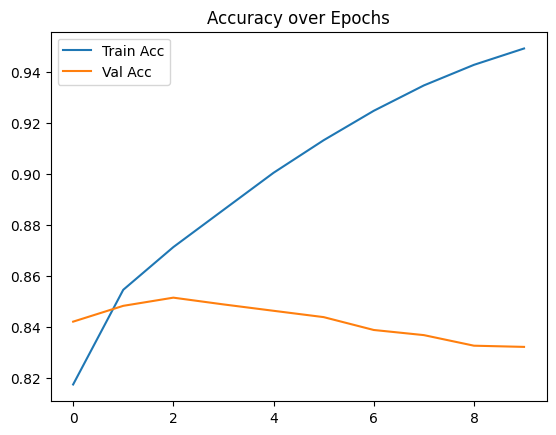

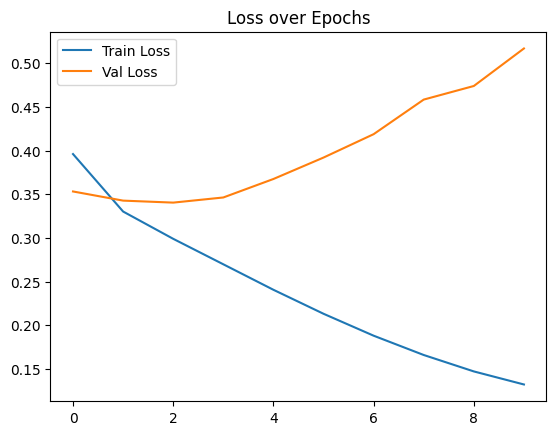

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [ ]:
keras.saving.save_model(model, 'Sentiment_Analysis.keras')

In [ ]:
model.save("Sentiment_Analysis_2.h5")

9. Tuning Hyperparameters

In [138]:
# After evaluating the model, we can confirm that the model is overfitting. We need to tune the hyperparameters to make it better

In [139]:
# Building the model architecture again

In [140]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [141]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, kernel_regularizer=regularizers.l2, activation='relu'),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [142]:
# Compiling the model

In [143]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [144]:
# Adding early stopping

In [145]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    restore_best_weights=True
)

In [146]:
# Training the model again

In [147]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping]
)

Epoch 1/10
20005/20005 ━━━━━━━━━━━━━━━━━━━━ 354s 18ms/step - accuracy: 0.7659 - loss: 0.4882 - val_accuracy: 0.8357 - val_loss: 0.3737
Epoch 2/10
20005/20005 ━━━━━━━━━━━━━━━━━━━━ 393s 20ms/step - accuracy: 0.8483 - loss: 0.3520 - val_accuracy: 0.8425 - val_loss: 0.3633
Epoch 3/10
20005/20005 ━━━━━━━━━━━━━━━━━━━━ 390s 19ms/step - accuracy: 0.8674 - loss: 0.3181 - val_accuracy: 0.8422 - val_loss: 0.3661
Epoch 4/10
20005/20005 ━━━━━━━━━━━━━━━━━━━━ 370s 18ms/step - accuracy: 0.8828 - loss: 0.2891 - val_accuracy: 0.8415 - val_loss: 0.3778


10. Testing

In [157]:
predictions = model.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)
print(predictions[:5])
print(predicted_classes[:5])

4287/4287 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step
[[0.60435236]
 [0.00787964]
 [0.6335838 ]
 [0.09666335]
 [0.2947789 ]]
[[1]
 [0]
 [1]
 [0]
 [0]]


11. Final Evaluation

In [148]:
loss, accuracy = model.evaluate(x_val, y_val)
print(loss)
print(accuracy)

4287/4287 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8432 - loss: 0.3629
0.363302618265152
0.842460572719574


In [155]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4287/4287 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.8391 - loss: 0.3680
Test Loss: 0.36455589532852173
Test Accuracy: 0.8408360481262207


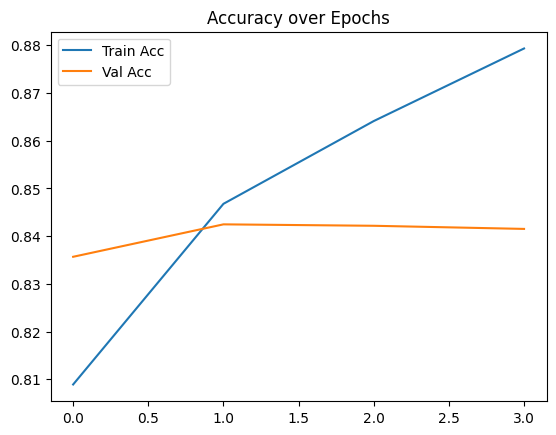

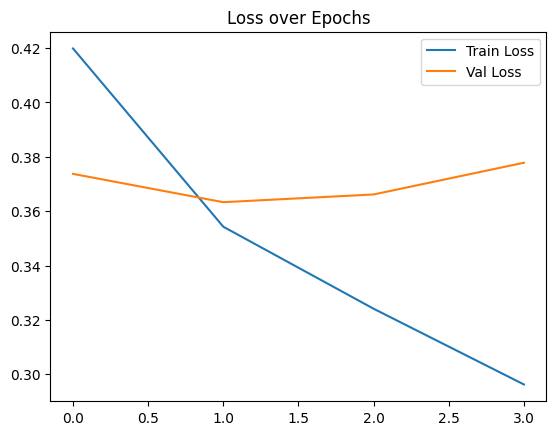

In [152]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [158]:
# Confusion Matrix, precision and recall
from sklearn.metrics import confusion_matrix, classification_report

In [159]:
y_pred = (model.predict(x_test)>0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

4287/4287 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step
Confusion Matrix:
 [[57700 10284]
 [11549 57640]]


In [160]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     67984
           1       0.85      0.83      0.84     69189

    accuracy                           0.84    137173
   macro avg       0.84      0.84      0.84    137173
weighted avg       0.84      0.84      0.84    137173



12. Saving The Model

In [150]:
keras.saving.save_model(model, 'Final_Model_Keras.keras')

In [151]:
model.save('Final_Model_H5.h5')